In [67]:
import os

path = '/home/fatma/Data/PhD/code/prism_ws/prism-svn/prism/tests/wkspace/simpleTests/results/'

def getFiles(path,ext):
    files = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if ext in file:
                files.append(os.path.join(r, file))
    return files

files = getFiles(path,'.txt')




In [68]:
maxRollOuts = 0 
rollOutFiles = {}
for f in files:
    if "values" in f:
        #print f 
        itnum = f.split('_')
        itnum = itnum[-2]
        itnum = int(itnum)
        #print itnum
        if(itnum > maxRollOuts):
            maxRollOuts=itnum
        rollOutFiles[itnum] = f
        
print maxRollOuts


51


In [69]:

rollOutLines = {}
rollOutIters = {}

for i in range(1,maxRollOuts+1):
    #lets parse this file 
    fn = rollOutFiles[i]
    maxIters = 0
    with open(fn) as f:
        lines = f.readlines()
        cleanLines = []
        iterLines = {}
        for line in lines:
            line =line.replace('\n','')
            line = line.replace('=',':')
            lineParts = line.split(',',1)
            #print lineParts
            iterNum = int(lineParts[0])
            if iterNum > maxIters:
                maxIters = iterNum
                
            iterDict = eval(lineParts[1])
            if iterNum not in iterLines:
                iterLines[iterNum]=[iterDict]
            else:
                iterLines[iterNum].append(iterDict)
            
        cleanLines = iterLines
        rollOutLines[i] = cleanLines
        rollOutIters[i] = maxIters
        #print cleanLines
#print rollOutIters        

In [72]:
stateValues = {}
stateActionValues = {}
stateActions = {}
for i in range(1,maxRollOuts+1):
    maxIters = rollOutIters[i]+1
    for j in range(1,maxIters):
        linesForIter = rollOutLines[i][j]
        for lineForIter in linesForIter:
            dictToUse=stateValues
            
            s = lineForIter['s']
            p = lineForIter['p']
            pr = lineForIter['pr']
            r = lineForIter['r'][0]
            a=None
            if 'a' in lineForIter:
                dictToUse = stateActionValues
                a = lineForIter['a']
            if a is None:
                if s not in stateValues:
                    stateValues[s]={'p':{'u':[],'l':[]},'pr':{'u':[],'l':[]},'r':{'u':[],'l':[]}}
                    #print stateValues[s]
                stateValues[s]['p']['u'].append(p[0])
                stateValues[s]['p']['l'].append(p[1])
                stateValues[s]['pr']['u'].append(pr[0])
                stateValues[s]['pr']['l'].append(pr[1])
                stateValues[s]['r']['u'].append(r[0])
                stateValues[s]['r']['l'].append(r[1])
            else:
                if s not in stateActionValues:
                    stateActionValues[s]={}
                if a not in stateActionValues[s]:
                    stateActionValues[s][a]={'p':{'u':[],'l':[]},'pr':{'u':[],'l':[]},'r':{'u':[],'l':[]}}
                stateActionValues[s][a]['p']['u'].append(p[0])
                stateActionValues[s][a]['p']['l'].append(p[1])
                stateActionValues[s][a]['pr']['u'].append(pr[0])
                stateActionValues[s][a]['pr']['l'].append(pr[1])
                stateActionValues[s][a]['r']['u'].append(r[0])
                stateActionValues[s][a]['r']['l'].append(r[1])
                if s not in stateActions:
                    stateActions[s]=[a]
                if a not in stateActions[s]:
                    stateActions[s].append(a)

                
#print stateValues 
#print stateActionValues

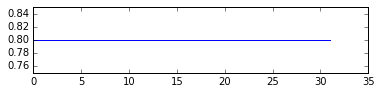

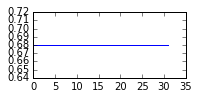

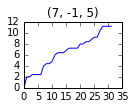

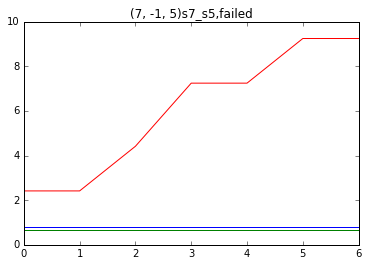

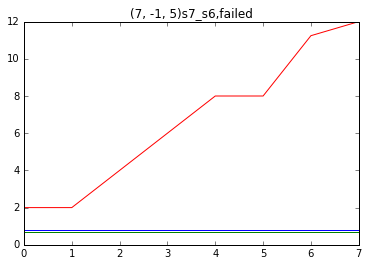

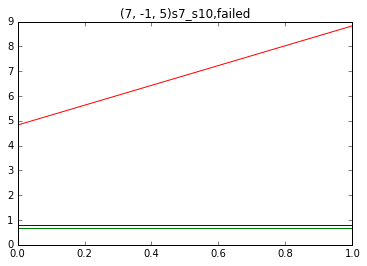

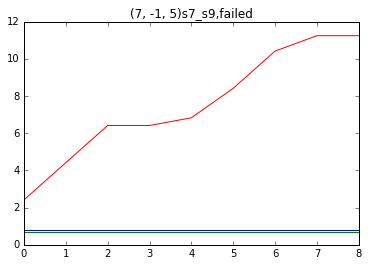

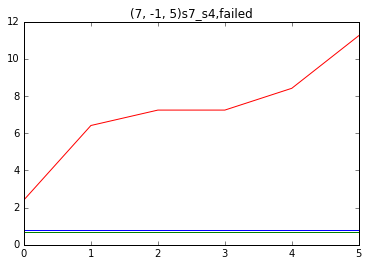

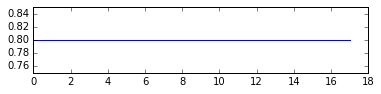

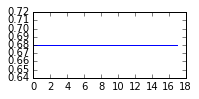

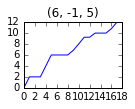

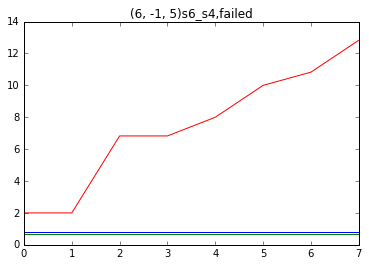

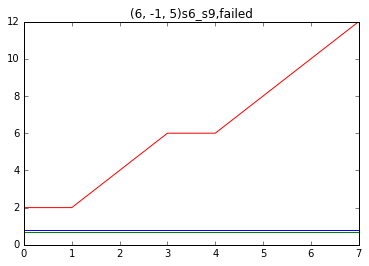

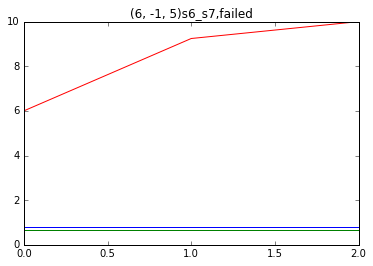

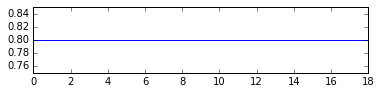

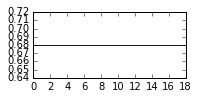

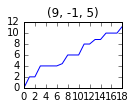

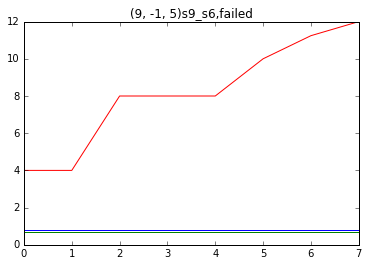

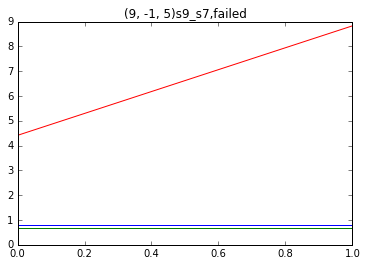

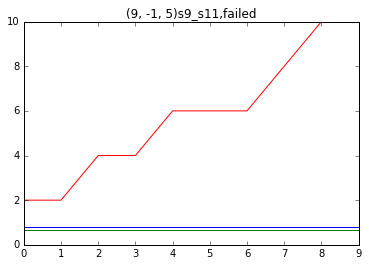

In [80]:
import matplotlib.pyplot as plt

def plotState(state,stateValues,stateActionValues,stateActions):
    p = stateValues[state]['p']['l']
    pr = stateValues[state]['pr']['l']
    c = stateValues[state]['r']['l']
    x = range(0,len(p))
    alen = len(stateActions[s])+1
    plt.subplot(3,1,1)
    plt.plot(x,p)
    plt.show()
    plt.subplot(3,2,1)
    plt.plot(x,pr)
    plt.show()
    plt.subplot(3,3,1)
    plt.plot(x,c)
    plt.title(str(state))
    plt.show()
    acount = 2 
    if state in stateActionValues:
        #print stateActionValues[s]
        for a in stateActionValues[state]:
            p = stateActionValues[state][a]['p']['l']
            pr = stateActionValues[state][a]['pr']['l']
            c = stateActionValues[state][a]['r']['l']
            x = range(0,len(p))
            plt.plot(x,p)
            plt.plot(x,pr)
            plt.plot(x,c)
            plt.title(str(state)+a)
            plt.show()
            acount = acount+1
    
    plt.show()
    
#for state in stateActionValues:
#    print state
statesToPlot = [(7,-1,5),(6,-1,5),(9,-1,5)]    
for state in statesToPlot:
    plotState(state,stateValues,stateActionValues,stateActions)
    
    

#for state in stateActionValues:
#    print state
#    p = stateActionValues[state]['p']['l']
#    pr = stateActionValues[state]['pr']['l']
#    c = stateActionValues[state]['r']['l']
#    x = range(0,len(p))
#    plt.plot(x,p)
#    plt.plot(x,pr)
#    plt.plot(x,c)
#    plt.title(str(state))
#    plt.show()
    